## Analysing Consumer Behaviour Shifts Among Millennials During the COVID-19 Pandemic: A Data-Driven Approach
  
  
## by 
  
## Asaph Nii Ayitey Sowah



## Imported Libraries

This notebook cell imports various libraries necessary for data analysis and machine learning. It also loads an Excel dataset and displays basic information about it.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from numpy.random import randn
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from scipy import stats
from sklearn.model_selection import cross_val_score

## Data Loading and Inspection

This section of the code is responsible for loading an Excel dataset into a pandas DataFrame and performing an initial inspection to ensure the data has been loaded correctly.






In [2]:
# Define the file path
file_path = 'C:/Users/owner/Desktop/oomph CVII study cycle 2 - B2C Quant data set 2021.xlsx'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name='CVII Study cycle 2 -Quant Data')

# Display the first few rows to confirm loading
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260 entries, 0 to 3259
Data columns (total 74 columns):
 #   Column                                                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                              --------------  -----  
 0   ID                                                                                                                                                                                                                  3260 non-null   int64  
 1   Unnamed: 1                                                                                                                                                           

## Column Removal and Data Saving

This section of the code focuses on removing a specific column(Unamed)from the DataFrame, saving the updated DataFrame to a CSV file, and displaying the DataFrame after the modification.




In [3]:

# Delete the column named 'Unnamed: 1'
df.drop('Unnamed: 1', axis=1, inplace=True)

# Save the DataFrame after deleting the column
df.to_csv('data_after_deleting_column.csv', index=False)

# Display the DataFrame after deleting the column
print("\nDataFrame after deleting 'Unnamed: 1' column:")
df


DataFrame after deleting 'Unnamed: 1' column:


,ID,Are you currently residing in the UK?,Screening question to ensure respondent is active in stated Sector,Sector,"Thinking about your use of [the sector], which brand/company/organisation comes to mind first?",1. In which age range are you?,2. What is your gender?,3. What is your household status?,4. Where are you located?,5. Where do you live in England?,...,More flexible hours..1,Greater availability of personnel or support..1,Staying economically active during the pandemic..1,More communication with me..1,Provision of guidance around the application of social distancing..1,Customer support for digitised services (e.g. live web chat support).,More information about the future of the business..1,If you would like other forms of support from [NAME OF ORGANISATION REFERENCED] please describe them in around 20 words below:,Unnamed: 72,Submitted
0,58779,Yes,Yes,Automotive,Ford,55 - 65,Male,Single person household,Scotland,NaN,...,Not helpful,Not helpful,Not helpful,Not helpful,Not helpful,Not helpful,Not helpful,NaN,NaN,2021-01-14 07:21:00
1,58789,Yes,Yes,Automotive,Ford,46 - 54,Male,Parents with school-age children,England,Lancashire,...,Very helpful,Very helpful,Very helpful,Very helpful,Very helpful,Very helpful,Very helpful,NaN,NaN,2021-01-14 07:27:00
2,58794,Yes,Yes,Automotive,Suzuki,66 - 75,Male,Shared adult household,England,Suffolk,...,Somewhat helpful,Somewhat helpful,Extremely helpful,Not helpful,Somewhat helpful,Somewhat helpful,Not helpful,See previous answer,NaN,2021-01-14 07:31:00
3,58812,Yes,Yes,Automotive,Honda,46 - 54,Female,Parents with school-age children,England,Northumberland,...,Not helpful,Not helpful,Not helpful,Not helpful,Not helpful,Not helpful,Not helpful,nothing to add,NaN,2021-01-14 07:50:00
4,58823,Yes,Yes,Automotive,Mercedes-Benz,36 - 45,Male,Parents with preschool-age children,England,Middlesex and London,...,Very helpful,Extremely helpful,Somewhat helpful,Somewhat helpful,Extremely helpful,Extremely helpful,Extremely helpful,NaN,NaN,2021-01-14 07:56:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255,61898,Yes,Yes,Retail,Amazon,55 - 65,Female,Single person household,England,Kent,...,Very helpful,Somewhat helpful,Very helpful,Somewhat helpful,Somewhat helpful,Somewhat helpful,Somewhat helpful,NaN,NaN,44213.911111
3256,61902,Yes,Yes,Retail,Amazon,46 - 54,Female,Cohabiting no children,England,Derbyshire,...,Somewhat helpful,Very helpful,Somewhat helpful,Somewhat helpful,Not helpful,Not helpful,Somewhat helpful,NaN,NaN,44213.916667
3257,61903,Yes,Yes,Retail,Not Known / Other,25 - 35,Female,Parents with school-age children,England,Middlesex and London,...,Somewhat helpful,Somewhat helpful,Very helpful,Somewhat helpful,Somewhat helpful,Somewhat helpful,Somewhat helpful,No,NaN,44213.922917
3258,61908,Yes,Yes,Retail,Aldi,66 - 75,Female,Shared adult household,England,Lancashire,...,Very helpful,Very helpful,Very helpful,Somewhat helpful,Very helpful,Very helpful,Very helpful,NaN,NaN,44213.943056


## Filtering Data for Millennials, Selecting relevant columns and Saving to CSV

This section of the code filters the dataset to include only rows corresponding to millennial age ranges and retains specific columns. The filtered data is then saved to a CSV file for further analysis.

### Code Explanation

In [4]:
# Define the millennial age ranges
millennial_ages = ['25 - 35', '36 - 45']

# Define the columns to keep (make sure these match the columns present in the DataFrame)
columns_to_keep = [
    '1. In which age range are you?',
    '2. What is your gender?', 
    '3. What is your household status?', 
    'Sector',
    'Staying economically active during the pandemic..1', 
    "20. What impact has COVID-19 had on your ability to use [NAME OF ORGANISATION REFERENCED]'s products and/or services?", 
    '17. To what extent has your buying behaviour changed - for example where you shop, how you shop, what you buy?',
    '17a. Do you anticipate returning to your pre-COVID-19 shopping habits or routines?',
    '17b. Why?',
    'Staying economically active during the pandemic.',
]

# Filter the DataFrame based on the specified age ranges
filtered_data = df[df['1. In which age range are you?'].isin(millennial_ages)]

# Further filter to keep only the specified columns
filtered_data = filtered_data[columns_to_keep]

# Save the filtered DataFrame to a CSV file
filtered_data.to_csv('filtered_data_millennials.csv', index=False)
print("\nFiltered DataFrame with millennial age ranges and selected columns:")
filtered_data


Filtered DataFrame with millennial age ranges and selected columns:


,1. In which age range are you?,2. What is your gender?,3. What is your household status?,Sector,Staying economically active during the pandemic..1,20. What impact has COVID-19 had on your ability to use [NAME OF ORGANISATION REFERENCED]'s products and/or services?,"17. To what extent has your buying behaviour changed - for example where you shop, how you shop, what you buy?",17a. Do you anticipate returning to your pre-COVID-19 shopping habits or routines?,17b. Why?,Staying economically active during the pandemic.
4,36 - 45,Male,Parents with preschool-age children,Automotive,Somewhat helpful,Positive impact - the products/services have b...,Wholesale change - my buying behaviour is com...,Yes,Because it's more convenient and energy saving.,Very helpful
7,36 - 45,Female,Parents with school-age children,Automotive,Very helpful,Some impact - the products/services are less a...,Moderate change - I have changed some areas of...,Yes,i miss shopping,Very helpful
8,36 - 45,Male,Shared adult household,Automotive,Extremely helpful,Some impact - the products/services are less a...,There is no change to my buying behaviour,No,NaN,Extremely helpful
10,25 - 35,Male,Cohabiting no children,Automotive,Somewhat helpful,Little impact - the products/services have mor...,There is no change to my buying behaviour,NaN,NaN,Somewhat helpful
11,36 - 45,Female,Parents with school-age children,Automotive,Somewhat helpful,Some impact - the products/services are less a...,Moderate change - I have changed some areas of...,No,Easier to shop online,Very helpful
...,...,...,...,...,...,...,...,...,...,...
3249,36 - 45,Female,Parents with school-age children,Retail,Extremely helpful,Little impact - the products/services have mor...,Moderate change - I have changed some areas of...,Yes,I have always opted for home delivery for food...,Extremely helpful
3252,25 - 35,Male,Parents with preschool-age children,Retail,Very helpful,Little impact - the products/services have mor...,Significant change - my buying behaviour is ve...,No,no reason,Very helpful
3254,36 - 45,Female,Parents with school-age children,Retail,Very helpful,Some impact - the products/services are less a...,Wholesale change - my buying behaviour is com...,No,NaN,Very helpful
3257,25 - 35,Female,Parents with school-age children,Retail,Very helpful,Little impact - the products/services have mor...,Significant change - my buying behaviour is ve...,Yes,No,Somewhat helpful


# Visualizing Sector Distribution by Gender for Millennials

This script visualizes the distribution of sectors among different genders for a millennial dataset using Seaborn and Matplotlib. The visualization provides insights into sector preferences based on gender.




c:\Users\owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  func(*plot_args, **plot_kwargs)


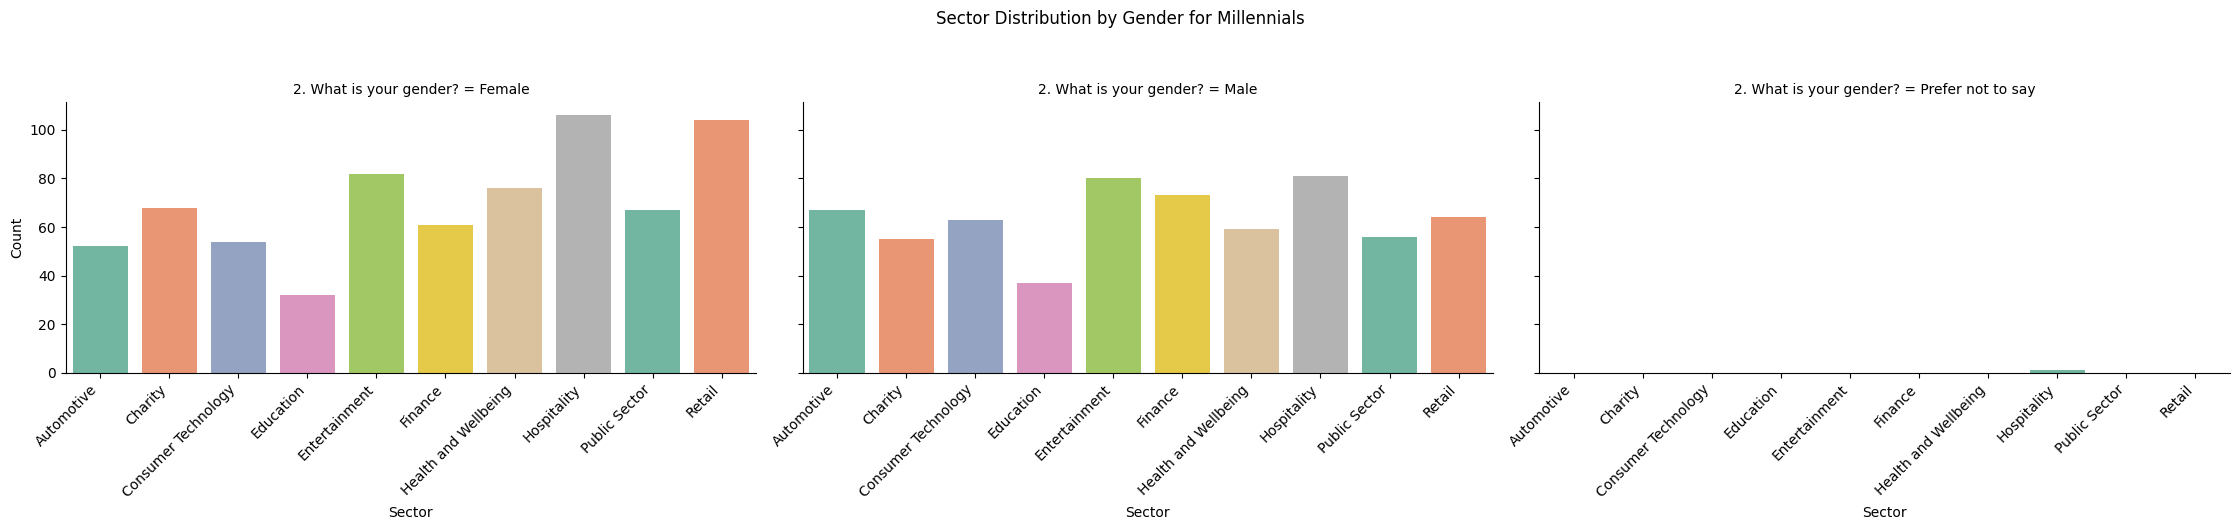

In [5]:


# Define the columns for gender and sector
gender_col = '2. What is your gender?'
sector_col = 'Sector'

# Prepare data for plotting
plot_data = filtered_data.groupby([gender_col, sector_col]).size().reset_index(name='Count')

# Define a custom color palette
custom_palette = sns.color_palette("Set2", n_colors=len(plot_data[sector_col].unique()))

# Plotting
g = sns.FacetGrid(plot_data, col=gender_col, col_wrap=3, height=5, aspect=1.5)  # Increased height
g.map_dataframe(sns.barplot, x=sector_col, y='Count', hue=sector_col, palette=custom_palette)

# Rotate x-axis labels and ensure they are properly set
for ax in g.axes.flatten():
    ax.set_xticks(ax.get_xticks())  # Ensure correct ticks are set
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate labels for readability

# Title and labels
g.fig.suptitle('Sector Distribution by Gender for Millennials', y=1.05)
g.set_axis_labels('Sector', 'Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## Household Status Distribution by Gender for Millennials

This visualization displays the distribution of household statuses among different genders in the millennial age group. The plot uses six distinct colors to differentiate between household status categories. The legend is positioned outside the plot area to ensure clarity.






<Figure size 1600x1000 with 0 Axes>

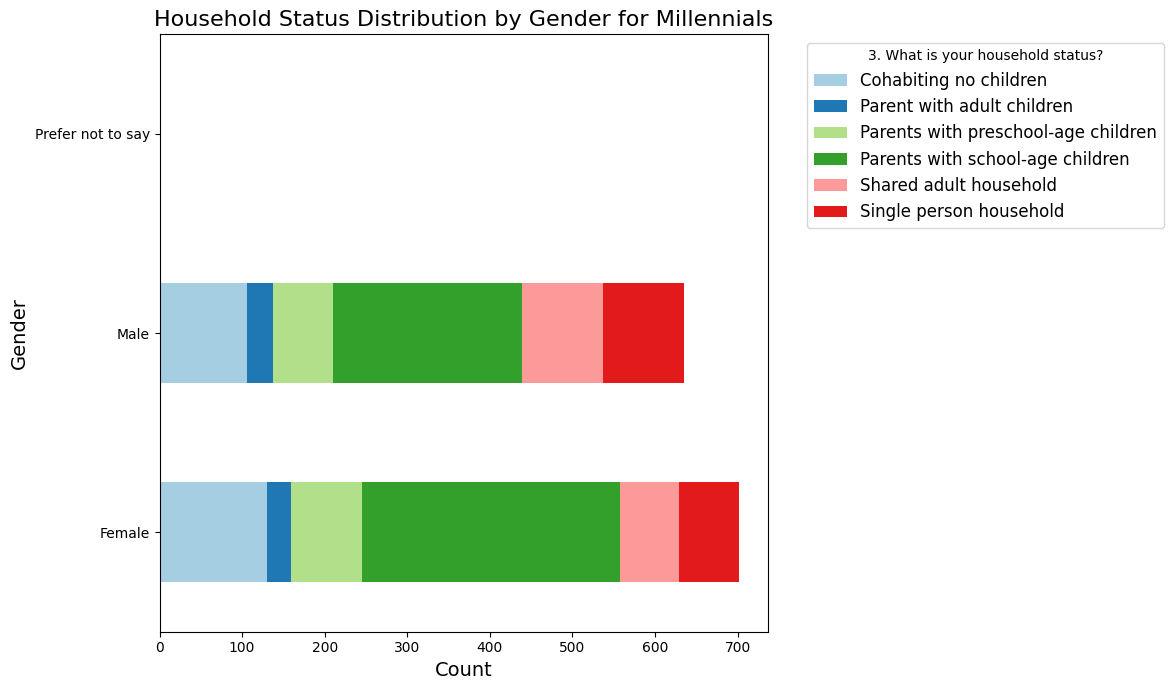

In [6]:

# Define the columns for gender and household status
gender_col = '2. What is your gender?'
household_col = '3. What is your household status?'

# Group by gender and household status, then count occurrences
grouped = filtered_data.groupby([gender_col, household_col]).size().unstack(fill_value=0)

# Define a custom color palette with six distinct colors
custom_palette = sns.color_palette("Paired", n_colors=len(grouped.columns))

# Plotting
plt.figure(figsize=(16, 10))  # Increase figure size for better clarity
ax = grouped.plot(kind='barh', stacked=True, color=custom_palette, figsize=(12, 7))

# Move the legend outside the plot area
plt.legend(title=household_col, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Title and labels
plt.title('Household Status Distribution by Gender for Millennials', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Gender', fontsize=14)

# Adjust layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()






## Analyzing and Visualizing the Impact of COVID-19 on Sectors for Millennials

This section processes and visualizes the impact of COVID-19 on the ability to use certain products or services, specifically for millennials. The data is filtered to include only millennial respondents before performing the analysis.





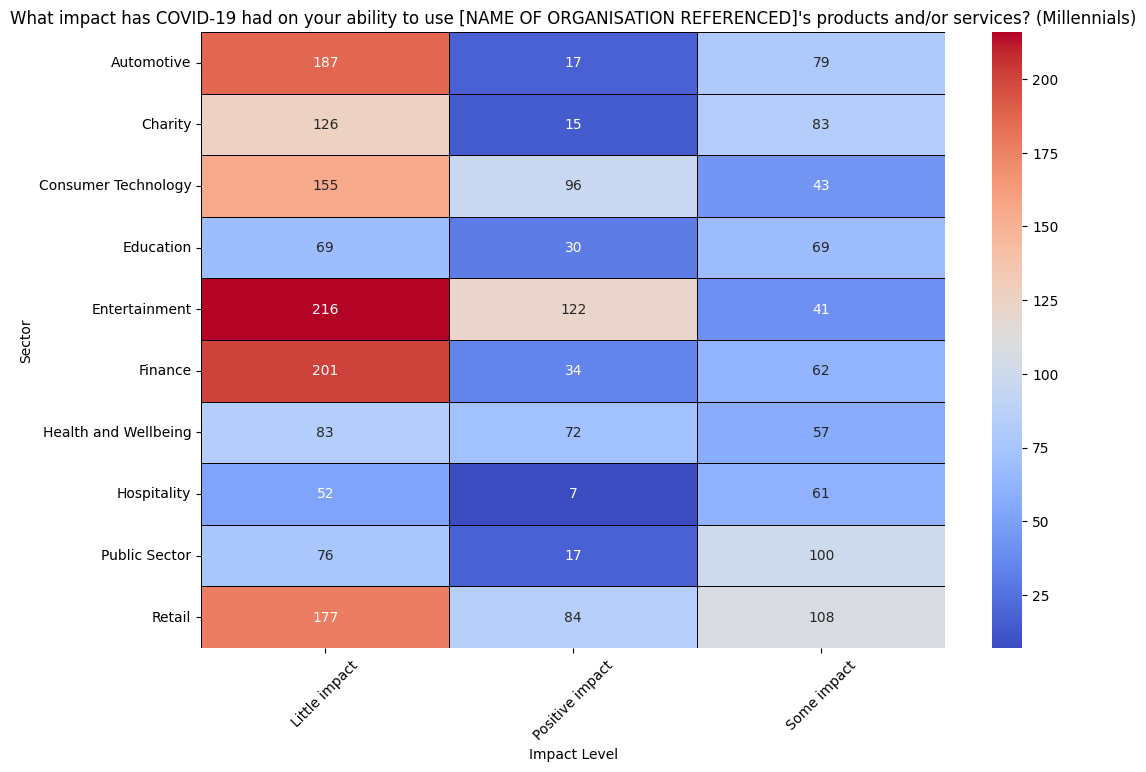

In [7]:

# Define columns and mappings
impact_column = '20. What impact has COVID-19 had on your ability to use [NAME OF ORGANISATION REFERENCED]\'s products and/or services?'
sector_column = 'Sector'

impact_mapping = {
    'Little impact - the products/services have more or less the same accessibility to you.': 1,
    'Positive impact - the products/services have become more important and accessible to you.': 2,
    'Some impact - the products/services are less accessible but you are still able to effectively engage or transact.': 3
}

# Create a copy of the DataFrame and map text to numeric values
df_copy = df.copy()
df_copy['Impact_Numeric'] = df_copy[impact_column].map(impact_mapping)

# Drop rows with NaN values in 'Impact_Numeric'
df_copy.dropna(subset=['Impact_Numeric'], inplace=True)

# Ensure 'Impact_Numeric' is of integer type
df_copy['Impact_Numeric'] = df_copy['Impact_Numeric'].astype(int)

# Create pivot table
heatmap_data = pd.pivot_table(df_copy, index=sector_column, columns='Impact_Numeric', aggfunc='size', fill_value=0)

# Define labels for the heatmap columns
impact_labels = {
    1: 'Little impact',
    2: 'Positive impact',
    3: 'Some impact'
}

# Rename columns in heatmap_data for clarity
heatmap_data.columns = [impact_labels.get(col, col) for col in heatmap_data.columns]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='black')
plt.title('What impact has COVID-19 had on your ability to use [NAME OF ORGANISATION REFERENCED]\'s products and/or services? (Millennials)')
plt.xlabel('Impact Level')
plt.ylabel('Sector')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


## Target Column to be used For Sentiment Analysis ("17b. Why?")   Whether millennials anticipate returning back to their old shopping habits 

In [8]:


# Filter the DataFrame based on the specified age ranges
filtered_data = df[df['1. In which age range are you?'].isin(millennial_ages)]

# Further filter to keep only the specified columns
filtered_data = filtered_data[columns_to_keep]

# View only column '17b. Why?'
column_17b = filtered_data[['17b. Why?']]

# Print the filtered DataFrame with only column '17b'
print("\nFiltered DataFrame with only column '17b':")
print(column_17b)



Filtered DataFrame with only column '17b':
                                              17b. Why?
4       Because it's more convenient and energy saving.
7                                       i miss shopping
8                                                   NaN
10                                                  NaN
11                               Easier to shop online 
...                                                 ...
3249  I have always opted for home delivery for food...
3252                                          no reason
3254                                                NaN
3257                                                 No
3259  I have started shopping online more and I pref...

[1338 rows x 1 columns]


## Sentiment Analysis using : Using TextBlob to analyse text sentiment, classifying it as 'Positive', 'Neutral', or 'Negative' based on polarity  and Visualization Script for Survey Responses

This section displays a sample of textual responses with their sentiment classification and visualizes the distribution of sentiments.




Filtered DataFrame with millennial age ranges, selected columns, and sentiment analysis:
                                          17b. Why? 17b. Why? Sentiment
4   Because it's more convenient and energy saving.            positive
7                                   i miss shopping             neutral
11                           Easier to shop online              neutral
14                              New setup is better            positive
16                            Business is business.             neutral
                                              17b. Why? 17b. Why? Sentiment
4       Because it's more convenient and energy saving.            positive
7                                       i miss shopping             neutral
11                               Easier to shop online              neutral
14                                  New setup is better            positive
16                                Business is business.             neutral
18                    

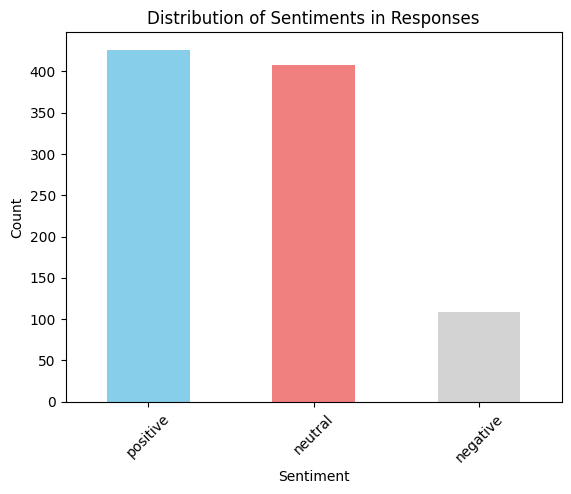

In [9]:
# Define sentiment analysis function to classify into categories
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Clean the filtered data by dropping rows with NaN in '17b. Why?' column
filtered_data.dropna(subset=['17b. Why?'], inplace=True)
filtered_data.to_csv('filtered_data_millennials_cleaned.csv', index=False)

# Apply the updated sentiment analysis function to the '17b. Why?' column
filtered_data['17b. Why? Sentiment'] = filtered_data['17b. Why?'].apply(lambda x: get_sentiment(str(x)))

# Save the DataFrame with the new sentiment column to a CSV file
filtered_data.to_csv('filtered_data_millennials_with_sentiment.csv', index=False)

# Display the DataFrame with the new sentiment column
print("\nFiltered DataFrame with millennial age ranges, selected columns, and sentiment analysis:")
print(filtered_data[['17b. Why?', '17b. Why? Sentiment']].head())

# Display all entries in the '17b. Why?' and '17b. Why? Sentiment' columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    
    print(filtered_data[['17b. Why?', '17b. Why? Sentiment']])


text_column = '17b. Why?'  
sentiment_column = '17b. Why? Sentiment' 

# Plot the distribution of sentiments
sentiment_counts = filtered_data[sentiment_column].value_counts()
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgray'])
plt.title('Distribution of Sentiments in Responses')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

filtered_data.to_csv('filtered_data_millennials.csv', index=False)

## Word Cloud Visualization of Responses

This section generates a word cloud to visually represent the most frequent words in the responses to the `17b. Why?` question. The word cloud highlights the prominent terms used by respondents regarding their anticipated shopping habits or routines post-COVID-19.


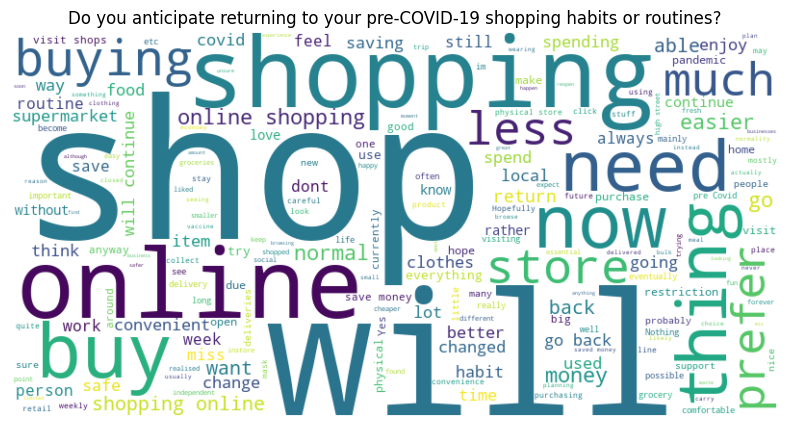

In [10]:
# Create a word cloud for the '17b. Why?' responses
text = ' '.join(filtered_data[text_column].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Do you anticipate returning to your pre-COVID-19 shopping habits or routines?')
plt.show()

## Sentiment Analysis Using Gaussian Naive Bayes

This section of the code performs sentiment analysis on the `17b. Why?` responses by training a Gaussian Naive Bayes classifier. It includes feature extraction from text, model training, prediction, and evaluation.





Classification Report:
              precision    recall  f1-score   support

    negative       0.16      0.50      0.24        30
     neutral       0.92      0.44      0.60       127
    positive       0.74      0.75      0.75       126

    accuracy                           0.59       283
   macro avg       0.61      0.56      0.53       283
weighted avg       0.76      0.59      0.62       283


Accuracy Score:
0.5865724381625441


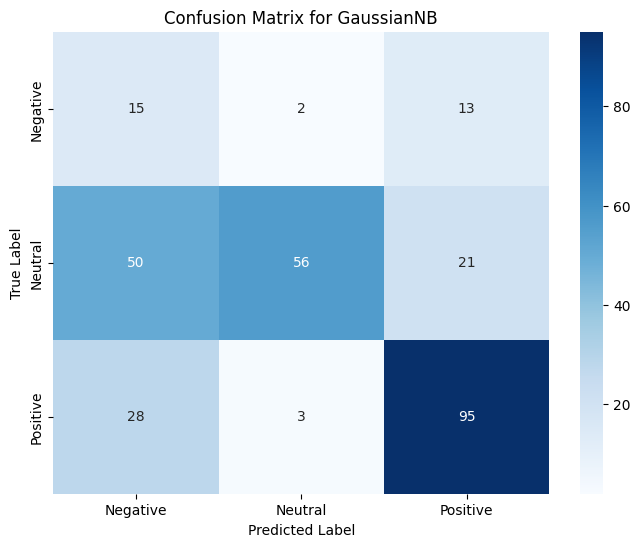

In [11]:
# Define columns for features and labels
text_column = '17b. Why?'  # Text data column
sentiment_column = '17b. Why? Sentiment'  # Sentiment column

# Encode sentiments into numerical values
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
filtered_data['Sentiment Label'] = filtered_data[sentiment_column].map(sentiment_mapping)

# Drop rows with NaN in the text or sentiment column
filtered_data = filtered_data.dropna(subset=[text_column, 'Sentiment Label'])

# Feature extraction: Convert text to a numerical representation
vectorizer = CountVectorizer()  # Using CountVectorizer for text feature extraction
X = vectorizer.fit_transform(filtered_data[text_column]).toarray()

# Labels
y = filtered_data['Sentiment Label']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for GaussianNB')
plt.show()



## Sentiment Analysis Using Logistic Regression

This section involves training a Logistic Regression model to classify sentiments in textual responses. It includes feature extraction, model training, evaluation, and the visualization of the confusion matrix.




Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.53      0.67        19
     neutral       0.85      0.95      0.90        86
    positive       0.91      0.88      0.90        84

    accuracy                           0.88       189
   macro avg       0.89      0.79      0.82       189
weighted avg       0.88      0.88      0.87       189


Accuracy Score:
0.8783068783068783


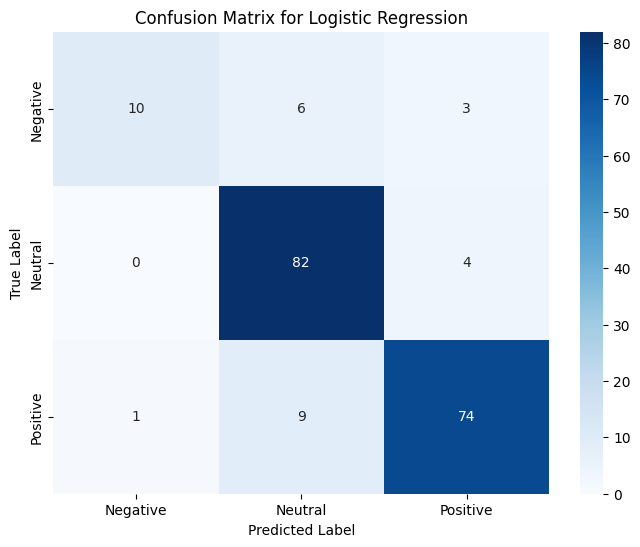

In [12]:


# Define columns for features and labels
text_column = '17b. Why?'  # Text data column
sentiment_column = '17b. Why? Sentiment'  # Sentiment column

# Encode sentiments into numerical values
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
filtered_data['Sentiment Label'] = filtered_data[sentiment_column].map(sentiment_mapping)

# Drop rows with NaN in the text or sentiment column
filtered_data = filtered_data.dropna(subset=[text_column, 'Sentiment Label'])

# Feature extraction: Convert text to a numerical representation
vectorizer = CountVectorizer()  # Using CountVectorizer for text feature extraction
X = vectorizer.fit_transform(filtered_data[text_column]).toarray()

# Labels
y = filtered_data['Sentiment Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

## Sentiment Analysis Using Random Forest

This section covers the use of a Random Forest classifier to analyze sentiments in text responses. It includes feature extraction, model training, evaluation, and visualization of the confusion matrix.




Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.53      0.69        19
     neutral       0.82      0.95      0.88        86
    positive       0.92      0.87      0.90        84

    accuracy                           0.87       189
   macro avg       0.91      0.78      0.82       189
weighted avg       0.88      0.87      0.87       189


Accuracy Score:
0.873015873015873


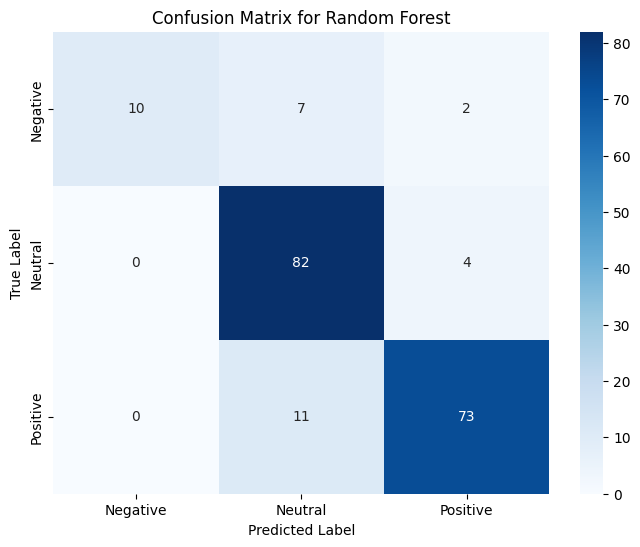

In [13]:
# Define columns for features and labels
text_column = '17b. Why?'  # Text data column
sentiment_column = '17b. Why? Sentiment'  # Sentiment column

# Encode sentiments into numerical values
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
filtered_data['Sentiment Label'] = filtered_data[sentiment_column].map(sentiment_mapping)

# Drop rows with NaN in the text or sentiment column
filtered_data = filtered_data.dropna(subset=[text_column, 'Sentiment Label'])

# Feature extraction: Convert text to a numerical representation
vectorizer = CountVectorizer()  # Using CountVectorizer for text feature extraction
X = vectorizer.fit_transform(filtered_data[text_column]).toarray()

# Labels
y = filtered_data['Sentiment Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()


## Model Evaluation and Comparison Using a Stacked Bar Chart to Compare their Performance by Analyzing their Predictions Against the Actual Values.



This section focuses on training and evaluating three different classification models: Logistic Regression, Gaussian Naive Bayes, and Random Forest. We compare their performance by analyzing their predictions against the actual values.



      Actual  Logistic Regression  Gaussian Naive Bayes  Random Forest
370        0                    0                    -1              0
1037       0                    0                     0              0
2811       0                    0                     0              0
72         1                    1                     1              1
105        1                    1                    -1              1
1115       1                    1                     1              1
2072       1                    1                     1              1
998        0                    0                    -1              0
1320       1                    1                     1              1
1299       0                    0                    -1              0
1634       1                    1                    -1              1
1782       0                    1                    -1              1
1136       0                    0                     0              0
3128  

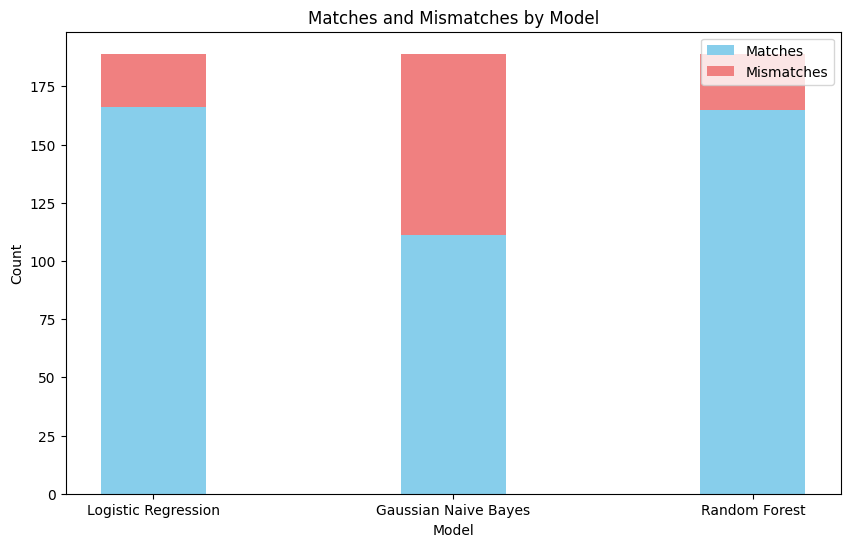

In [14]:
# Define columns for features and labels
text_column = '17b. Why?'  # Text data column
sentiment_column = '17b. Why? Sentiment'  # Sentiment column

# Encode sentiments into numerical values
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
filtered_data['Sentiment Label'] = filtered_data[sentiment_column].map(sentiment_mapping)

# Drop rows with NaN in the text or sentiment column
filtered_data = filtered_data.dropna(subset=[text_column, 'Sentiment Label'])

# Feature extraction: Convert text to a numerical representation
vectorizer = CountVectorizer()  # Using CountVectorizer for text feature extraction
X = vectorizer.fit_transform(filtered_data[text_column]).toarray()

# Labels
y = filtered_data['Sentiment Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logistic_model = LogisticRegression(max_iter=1000)
naive_bayes_model = GaussianNB()
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train models
logistic_model.fit(X_train, y_train)
naive_bayes_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Make predictions
logistic_pred = logistic_model.predict(X_test)
naive_bayes_pred = naive_bayes_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)

# Create a DataFrame to compare actual values and predictions
results_df = pd.DataFrame({
    'Actual': y_test,
    'Logistic Regression': logistic_pred,
    'Gaussian Naive Bayes': naive_bayes_pred,
    'Random Forest': random_forest_pred
})

# Display the comparison DataFrame
print(results_df.head(20))  # Display the first 20 rows

# Calculate matches and mismatches for each model
def calculate_matches_mismatches(y_true, y_pred):
    matches = sum(y_true == y_pred)
    mismatches = sum(y_true != y_pred)
    return matches, mismatches

# Calculate matches and mismatches for each model
logistic_matches, logistic_mismatches = calculate_matches_mismatches(y_test, logistic_pred)
naive_bayes_matches, naive_bayes_mismatches = calculate_matches_mismatches(y_test, naive_bayes_pred)
random_forest_matches, random_forest_mismatches = calculate_matches_mismatches(y_test, random_forest_pred)

# Data for stacked bar plot
models = ['Logistic Regression', 'Gaussian Naive Bayes', 'Random Forest']
matches = [logistic_matches, naive_bayes_matches, random_forest_matches]
mismatches = [logistic_mismatches, naive_bayes_mismatches, random_forest_mismatches]

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
bar1 = np.arange(len(models))

# Stacked bars
p1 = ax.bar(bar1, matches, bar_width, label='Matches', color='skyblue')
p2 = ax.bar(bar1, mismatches, bar_width, bottom=matches, label='Mismatches', color='lightcoral')

# Adding labels
ax.set_xlabel('Model')
ax.set_ylabel('Count')
ax.set_title('Matches and Mismatches by Model')
ax.set_xticks(bar1)
ax.set_xticklabels(models)
ax.legend()

plt.show()



## Model Accuracy and Statistical Comparison Using Paired T-tests

This section evaluates and compares the accuracies of three classification models—Logistic Regression, Gaussian Naive Bayes, and Random Forest—using cross-validation. It also performs paired t-tests to determine if the differences in their accuracies are statistically significant.

In [15]:
# Collect accuracy scores from cross-validation
logistic_accuracies = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=5, scoring='accuracy')
naive_bayes_accuracies = cross_val_score(GaussianNB(), X, y, cv=5, scoring='accuracy')
random_forest_accuracies = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X, y, cv=5, scoring='accuracy')

# Print average accuracies
print(f"Logistic Regression Average Accuracy: {logistic_accuracies.mean():.2f}")
print(f"Naive Bayes Average Accuracy: {naive_bayes_accuracies.mean():.2f}")
print(f"Random Forest Average Accuracy: {random_forest_accuracies.mean():.2f}")



# Perform paired t-tests
t_statistic_lr_rf, p_value_lr_rf = stats.ttest_rel(logistic_accuracies, random_forest_accuracies)
t_statistic_lr_nb, p_value_lr_nb = stats.ttest_rel(logistic_accuracies, naive_bayes_accuracies)
t_statistic_rf_nb, p_value_rf_nb = stats.ttest_rel(random_forest_accuracies, naive_bayes_accuracies)

# Print the results
print(f"Logistic Regression vs Random Forest - T-statistic: {t_statistic_lr_rf:.2f}, P-value: {p_value_lr_rf:.4f}")
print(f"Logistic Regression vs Naive Bayes - T-statistic: {t_statistic_lr_nb:.2f}, P-value: {p_value_lr_nb:.4f}")
print(f"Random Forest vs Naive Bayes - T-statistic: {t_statistic_rf_nb:.2f}, P-value: {p_value_rf_nb:.4f}")

# Significance level
alpha = 0.05

# Decision based on p-value
def interpret_results(p_value, model1, model2):
    if p_value < alpha:
        return f"Reject the null hypothesis: There is a significant difference between {model1} and {model2}."
    else:
        return f"Fail to reject the null hypothesis: There is no significant difference between {model1} and {model2}."

print(interpret_results(p_value_lr_rf, 'Logistic Regression', 'Random Forest'))
print(interpret_results(p_value_lr_nb, 'Logistic Regression', 'Naive Bayes'))
print(interpret_results(p_value_rf_nb, 'Random Forest', 'Naive Bayes'))

Logistic Regression Average Accuracy: 0.84
Naive Bayes Average Accuracy: 0.55
Random Forest Average Accuracy: 0.84
Logistic Regression vs Random Forest - T-statistic: 0.00, P-value: 0.9991
Logistic Regression vs Naive Bayes - T-statistic: 10.14, P-value: 0.0005
Random Forest vs Naive Bayes - T-statistic: 13.01, P-value: 0.0002
Fail to reject the null hypothesis: There is no significant difference between Logistic Regression and Random Forest.
Reject the null hypothesis: There is a significant difference between Logistic Regression and Naive Bayes.
Reject the null hypothesis: There is a significant difference between Random Forest and Naive Bayes.


## Hyperparameter Tuning with GridSearchCV

This section demonstrates how to use `GridSearchCV` to find the best hyperparameters for different classification models: Logistic Regression, Gaussian Naive Bayes, and Random Forest.

### Logistic Regression

Hyperparameter tuning for Logistic Regression involves adjusting parameters such as `C`, `penalty`, and `solver`.




In [16]:

# Logistic Regression
param_grid_logistic = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_search_logistic = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_logistic, cv=5, scoring='accuracy')
grid_search_logistic.fit(X_train, y_train)
print("\nBest Parameters for Logistic Regression:")
print(grid_search_logistic.best_params_)
print(f"Best Score: {grid_search_logistic.best_score_:.2f}")

# Gaussian Naive Bayes
param_grid_naive = {}
grid_search_naive = GridSearchCV(GaussianNB(), param_grid_naive, cv=5, scoring='accuracy')
grid_search_naive.fit(X_train, y_train)
print("\nBest Parameters for Gaussian Naive Bayes:")
print(grid_search_naive.best_params_)
print(f"Best Score: {grid_search_naive.best_score_:.2f}")

# Random Forest
param_grid_random = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
grid_search_random = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_random, cv=5, scoring='accuracy')
grid_search_random.fit(X_train, y_train)
print("\nBest Parameters for Random Forest:")
print(grid_search_random.best_params_)
print(f"Best Score: {grid_search_random.best_score_:.2f}")



Best Parameters for Logistic Regression:
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.87

Best Parameters for Gaussian Naive Bayes:
{}
Best Score: 0.55

Best Parameters for Random Forest:
{'max_depth': None, 'n_estimators': 200}
Best Score: 0.82
